170498071/170498071 [==============================] - 8s 0us/step
Epoch 1/10
782/782 [==============================] - 36s 44ms/step - loss: 1.5656 - accuracy: 0.4283
Epoch 2/10
782/782 [==============================] - 37s 47ms/step - loss: 1.1796 - accuracy: 0.5830
Epoch 3/10
782/782 [==============================] - 34s 43ms/step - loss: 1.0296 - accuracy: 0.6377
Epoch 4/10
782/782 [==============================] - 34s 43ms/step - loss: 0.9360 - accuracy: 0.6729
Epoch 5/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8620 - accuracy: 0.6986
Epoch 6/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8117 - accuracy: 0.7179
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 0.7607 - accuracy: 0.7355
Epoch 8/10
782/782 [==============================] - 33s 42ms/step - loss: 0.7161 - accuracy: 0.7505
Epoch 9/10
782/782 [==============================] - 33s 42ms/step - loss: 0.6773 - accuracy: 0.7644
Epoch 10/10
313

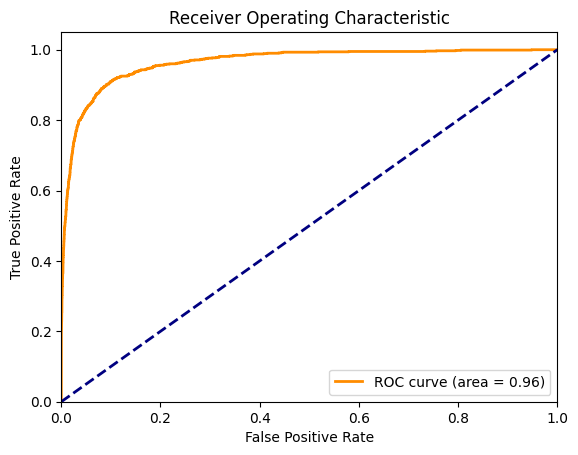

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the metrics
accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred_classes)

# Compute ROC curve and AUC for one class (e.g., class 0)
fpr, tpr, _ = roc_curve(y_test == 0, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Kappa: {kappa}")
print(f"AUC/ROC for class 0: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
